In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Show original image

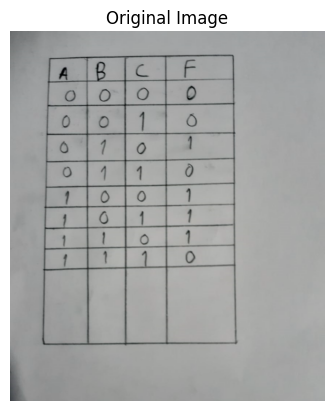

In [150]:
image = cv2.imread("../img/test5.png")
height, width = image.shape[:2]
cv2.namedWindow("Original Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image", width, height)
cv2.imshow("Original Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([image],["Original Image"])

## Binary Thresholding

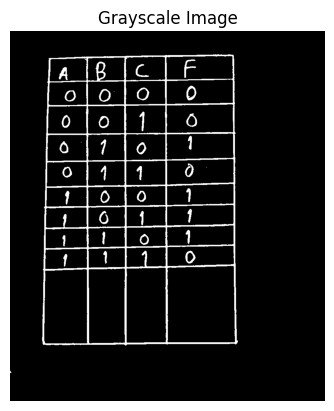

In [151]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.adaptiveThreshold(grayscale_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,75,15)
cv2.namedWindow("Grayscale Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Grayscale Image", width, height)
cv2.imshow("Grayscale Image", thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([thresh_img],["Grayscale Image"])

dilated=cv2.dilate(thresh_img,np.ones((5,1),np.uint8),iterations=0 )
cv2.imshow("Grayscale Image", dilated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [152]:

# #Create a black image as a canvas to draw the contours

# contour_image = np.zeros_like(dilated)

# # Draw the contours on the canvas
# for contour in contours:
#     if cv2.contourArea(contour) < 1000:
#         cv2.drawContours(contour_image, [contour], -1, (255), thickness=cv2.FILLED)
# #cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=2)

# # Display the result
# cv2.imshow('Contours', contour_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# show_images([contour_image],["Contours"])

# result = cv2.bitwise_and(thresh_img, thresh_img, mask=contour_image)
# result=cv2.dilate(result,np.ones((5,5),np.uint8),iterations=1)
# cv2.imshow('result', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# show_images([result],["result"])

96


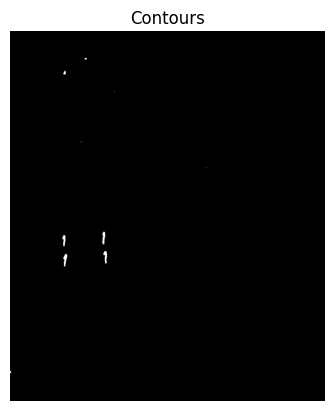

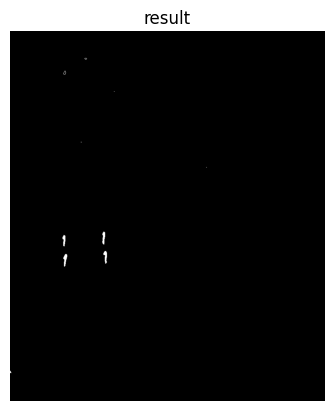

In [161]:
contours, _ = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contour1 = grayscale_image.copy()
cv2.drawContours(contour1, contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', contour1)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Create a black image as a canvas to draw the contours
contour_image = np.zeros_like(dilated)
print(len(contours))

# Draw the contours on the canvas
for contour in contours:
    if cv2.contourArea(contour) < 200:
        cv2.drawContours(contour_image, [contour], -1, (255), thickness=cv2.FILLED)
#cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=2)

# Display the result
cv2.imshow('Contours', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([contour_image],["Contours"])

result = cv2.bitwise_and(thresh_img, thresh_img, mask=contour_image)
#result=cv2.dilate(result,np.ones((5,5),np.uint8),iterations=1)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([result],["result"])

In [154]:
# params = cv2.SimpleBlobDetector_Params()
# params.filterByArea = True
# params.minArea = 1
# params.minDistBetweenBlobs = 10  # Adjust the value based on your image
# detector = cv2.SimpleBlobDetector_create(params)
# keypoints = detector.detect(dilated)
# keyp=grayscale_image.copy()
# for keypoint in keypoints:
#     x = int(keypoint.pt[0])
#     y = int(keypoint.pt[1])
#     cv2.circle(keyp, (x, y), int(keypoint.size / 2), (0, 255, 0), 2)

# # Display the result

# cv2.namedWindow("keypoints Image", cv2.WINDOW_NORMAL)
# cv2.resizeWindow("keypoints Image", width, height)
# cv2.imshow("keypoints Image", keyp)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Morphological Operations

In [155]:

# dst =cv2.Canny(dilated, 50, 200, None, 3)
# lines = cv2.HoughLines(dst,1.5, np.pi / 180, 150, None, 80, 10)
# cv2.namedWindow("canny Image", cv2.WINDOW_NORMAL)
# cv2.resizeWindow("canny Image", width, height)
# cv2.imshow("canny Image", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
# line_image=np.copy(image)*0
# print(dst.shape)
# print(line_image.shape)
# if lines is not None:
#         for i in range(0, len(lines)):
#             rho = lines[i][0][0]
#             theta = lines[i][0][1]
#             a = math.cos(theta)
#             b = math.sin(theta)
#             x0 = a * rho
#             y0 = b * rho
#             pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#             pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
#             cv2.line(line_image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
# line_image_gray = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)
# _, thresholded_lines = cv2.threshold(line_image_gray, 1, 255, cv2.THRESH_BINARY)
# cv2.namedWindow("lines Image", cv2.WINDOW_NORMAL)
# cv2.resizeWindow("lines Image", width, height)
# cv2.imshow("lines Image", thresholded_lines)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# result = cv2.subtract(thresh_img, thresholded_lines)

# cv2.namedWindow("nolines Image", cv2.WINDOW_NORMAL)
# cv2.resizeWindow("nolines Image", width, height)
# cv2.imshow("nolines Image", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [156]:

# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
# opening = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
# closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
# closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)

# cv2.namedWindow("MORPH Image", cv2.WINDOW_NORMAL)
# cv2.resizeWindow("MORPH Image", width, height)
# cv2.imshow("MORPH Image", closing)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# show_images([closing],["MORPH Image"])

## Remove Vertical and Horizontal Lines

## Draw Contours

In [157]:
# CHAIN_APPROX_SIMPLE to only store the necessary points of the contour
# RETR_EXTERNAL to only detect the outer contours
contours, hierarchy = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(contours)
grayscale_image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.drawContours(grayscale_image2, contours, -1, (0,255,0), 3)



array([[111, 110, 110, ..., 161, 161, 161],
       [110, 110, 110, ..., 160, 160, 160],
       [109, 109, 109, ..., 160, 160, 160],
       ...,
       [ 67,  68,  70, ..., 168, 168, 168],
       [ 67,  68,  70, ..., 168, 168, 168],
       [ 67,  68,  70, ..., 168, 168, 168]], dtype=uint8)

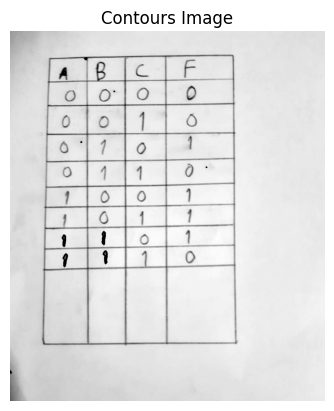

In [158]:
cv2.namedWindow("Contours Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Contours Image", width, height)
cv2.imshow("Contours Image", grayscale_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([grayscale_image2],["Contours Image"])

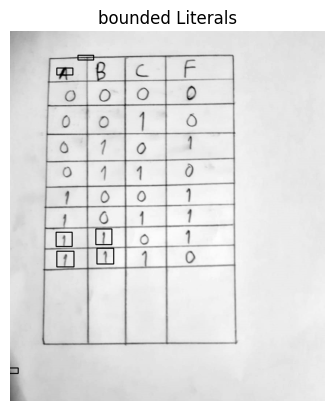

In [159]:
grayscale_image3 = cv2.cvtColor(cv2.imread("../img/test5.png"), cv2.COLOR_BGR2GRAY)

min_rectangle_area = 20
rectangles = np.array([cv2.boundingRect(c) for c in contours])
rectangles = [rect for rect in rectangles if rect[2] * rect[3] > min_rectangle_area]

x_offset=18
y_offset=5
for rect in rectangles:
    x, y, w, h = rect
    cv2.rectangle(grayscale_image3, (x-x_offset, y-y_offset-3), (x +x_offset +w, y + h+ y_offset -5), (0, 255, 0), 2)


cv2.namedWindow("bounded Literals", cv2.WINDOW_NORMAL)
cv2.resizeWindow("bounded Literals", width, height)
cv2.imshow("bounded Literals", grayscale_image3)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([grayscale_image3],["bounded Literals"])

In [160]:
x, y, w, h = rectangles[10]

extracted_rectangle = grayscale_image3[y-y_offset+2:y+h+y_offset-2, x-x_offset+3:x+w+x_offset-3]
resized_rectangle = cv2.resize(extracted_rectangle, (32, 32))

cv2.namedWindow("bounded Literals", cv2.WINDOW_NORMAL)
cv2.resizeWindow("bounded Literals", 32, 32)
cv2.imshow("bounded Literals", resized_rectangle)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(resized_rectangle)
cv2.imwrite("test.png",resized_rectangle)
# i=0
# for x, y, w, h in rectangles:
#     extracted_rectangle = grayscale_image4[y - y_offset + 2:y + h + y_offset - 2, x - x_offset + 3:x + w + x_offset - 3]
#     resized_rectangle = cv2.resize(extracted_rectangle, (32, 32))
#     cv2.imwrite(f"testset/test{i}.png", resized_rectangle)
#     i += 1
show_images([extracted_rectangle],["bounded Literals"])

IndexError: list index out of range